# <font size = 7> <center> Introduction to Probabilistic Graphical Models </center> </font>
  
 **<center>Practical Session 1</center>**

<font size=5> M2 DATASCIENCE 2019/2020 </font>
* ***BALL Alhousseynou***
* ***DIOP Seyni***

# Question 0

Suppose that we have $v =(v_1,...,v_n)$ such as $v_i$<0 and $|v_i|$ very large.

Directly calculating $\log\sum\exp(v_i)$ is a problem. So we do the following transformation

$\log\sum_{i=1}^n\exp(v_i)=\log\sum_{i=1}^n\exp(v_i-v_{max}+v_{max})$ with $v_{max}=max\left\{v_1,...v_n\right\}$

$$\log\sum_{i=1}^n\exp(v_i)=\log\sum_{i=1}^n\exp(v_i-v_{max}+v_{max})=\log\sum_{i=1}^n\exp(v_i-v_{max})*exp(v_{max})=\boldsymbol{v_{max}+\log\sum_{i=1}^n\exp(v_i-v_{max})}$$


In [0]:
# import nympy 
import numpy as np

In [0]:
def s(v):
    m = np.max(v)
    return m + np.log(np.sum(np.exp(v - m)))


In [0]:
# Let's test our function
v = ( -1234 , -1235)

s(v)

-1233.6867383124818

# Question 1


A robot is moving across a circular corridor. We assume that the possible positions of the robot is a discrete set with $N$ locations. The initial position of the robot is unknown and assumed to be uniformly distributed. At each step $k$, the robot stays where it is with probability $\varepsilon$, or moves to the next point in counter clock direction with probability $1 −\varepsilon$. At each step $k$, the robot can observe its true position with probability $\omega$. With probability $1 − \omega$, the position sensor fails and gives a measurement that is independent from the true position(uniformly distributed).

## 1.
**Generative model**

Let's define $X_k$ as the variable which give the true position of the robot at time $k$

 $X_k = 0,1,...,N-1$  
 $X_0 \sim \mathcal{U}(\{0,1,...,N-1\})$
$$\mathbb P(X_0,X_1, ... , X_T) = \mathbb P(X_0) \mathbb(X_1|X_0) ... \mathbb P(X_T|X_{T-1})$$


avec 

$$\mathbb P(x_t|x_{t-1}) =\varepsilon\delta(x_t-x_{t-1}) +(1- \varepsilon) \delta(x_t-x_{t-1}-1) $$

and we can rewrite it with transition matrix

$$
        p(x_{k+1} | x_k) = \varepsilon 
        \begin{pmatrix}
            1       & 0 & 0 & \dots & 0 \\
            0       & 1 & 0 & \dots & 0 \\
            \dots       & \dots & \ddots & \dots & \dots \\
            \dots       & \dots & \dots & \ddots & \dots \\
            0       & 0 & 0 & \dots & 1
        \end{pmatrix} 
        + (1 - \varepsilon) 
        \begin{pmatrix}
            0       & 0 & 0 & \dots & 1 \\
            1       & 0 & 0 & \dots & 0 \\
            \dots       & \ddots & \dots & \dots & \dots \\
            \dots       & \dots & \ddots & \dots & \dots \\
            0       & 0 & \dots & 1 & 0       
        \end{pmatrix}
$$

   ![image](https://ucd84c82212506d1e199b20d9796.previews.dropboxusercontent.com/p/thumb/AAk8IHF0Z4vgbvBdi10a31m9GDiXAow_nSv8H3NdSjtbN0lX9uty_XwA3LAVj31mMIwI-BBwIzrXIYPYSqCGs56yDMJKUsruOrBSr2rhlscRstGBLs2cfHuaxMtxI84z_nugb5baKqThOA66IoxXOFL9-hYsv42vrt1cmOHK4fkMoM-8FwNfBH5c87WfXyZMyW_tZwckMPuCajEQWeNmnFtaxUuuawC46bYZt7mcQcVTuO8_QJEIrot_TnJX88brlztbEJPcgvD6oKl4x5lXfalW6bOybJDU78wOosGT9DobzupH45VUyYiZNe_YsfQCDaPm-84uVXSS7sP6TnguQsa_6dsFkTwBZo3Al-a3NQf8KkTVAfoZ4hjH4zx6k4VgtMFkdOjYgNDff6OBQzzKLQ6K/p.jpeg?fv_content=true&size_mode=5)

## 2.

Define $Y_k$ as the variable representing the predicted position by the sensor.

 $$ \mathbb P(y_k|x_k) = \omega \delta(y_k-x_k) + (1-\omega) \mathcal{U}(\{0,1,...,N-1\})$$
  with  
   - $y_k$: predieted position by the sensor at time k
   - $x_k$: the true position of time k
   
   ![](https://ucb1d4990244cf7c36dbb9e63c5b.previews.dropboxusercontent.com/p/thumb/AAmXVIuwiVXyqOszL7kEM8tEYjZRud_ZuZFuOsAMVgGtG9x__Cg1sg1W4_IzOkqneUj1NPPkBteCPUgHo6cyWJTycvAkDQEiipc6kOBaMq3WD5m_1HYgQrj5nw7mtJ_YVUidpcwTW-UzuJeW8MzFbidjGSOn37gTKY1mkfRNAzrE0jowNekx_1ScQe-azq5WiCuBNKS65gKQDFqre8mhwNfLMKCzj_okFJqhJmLryfVdWVKmPxPqQetx_3Cl1pLlJ3q-FvToZsvvGgd0NnKZqktl7l2NXWyULZEGAmh81p2ajyg1cYL9l3RLHpgHXd2epnv_AMCqSYFgsJeVxIeaXvXNWWp7V9RNqDKJCVmeEsci6eWMRmG2a1YIzqhg2dvFVQJmJEhMfisjGLTxHn1pKNrh/p.jpeg?size=2048x1536&size_mode=3)


## 3.
- (a) ***Distribution of the robot’s current position given the observations so far***  

 $p(x_t|y_{1:t}) $

- (b) ***Distribution of the robot’s position at time step k given all the observations***

 $p(x_{k}|y_{1:T})$
- (c) ***Distribution of the robot’s next position given the observations so far***

 $p(x_{k+1}|x_{1:k-1})$
  
    
    
- (d) ***Distribution of the robot’s next sensor reading given the observations so far***  

 $p(y_{k+1}|y_{1:k}) $


- (e) ***Distribution of the robot’s initial position given observations so far***

 $p(x_{1}|y_{1:k}) $


- (f) ***Most likely current position of the robot given the observations so far***

 $\underset{x_k}{\mathrm{argmax}} \; p(x_k|y_{1:k}) $


- (g) ***Most likely trajectory taken by the robot from the start until now given the observations so far***  

 $\underset{x_{1:k}}{\mathrm{argmax}} \; p(x_{1:k}|y_{1:k}) $




## 4.

Let's implement a program that simulates this scenario; i.e., generate realizations from the movements of the robot and the associated sensor readings. We will simulate a scenario for $k = 1, \dots , 100$ with $N = 50$, $\varepsilon = 0.3$, $\omega = 0.8$.
</div>

In [0]:
#import packages that we need
import numpy as np
import matplotlib.pyplot as plt

# Overall let's define our global variable

## number of stages
N = 50  
##number of steps
K = 100
##
w = 0.8
eps = 0.3

# transition model
Id = np.identity(N)  #identity matrix
C = np.roll(Id, 1, axis=0) # circular matrix
trans_mat = w*Id + (1-w)*C  #transition matrix

# observation model
obs_mat = w*Id + (1-w)*np.ones((N,N))/N # observation matrix


In [0]:
#the initial position of the robot is unknown and assumed to be uniformly distributed
prob_start = np.ones(N)/N

def data_generate(trans_mat , obs_mat , prob_start, N , K) :
    """
    Parameters
    ----------
    trans_mat : Transition matrix
       `numpy.array`, shape (N, N)
       
    obs_mat :Observation matrix
      `numpy.array`, shape (N, N)
    
    prob_start : `numpy.array`, shape (N,)
        
    
    N : Number of states
       `int`
        
        
    K : Number of steps
        `int`
        

    Returns
    -------
    obs : observations
          shape (K,)
        
    
    state : `numpy.array`, shape (K,)
        The state trajectory
    """
    
    state = np.zeros(K, dtype = int)
    obs = np.zeros(K, dtype = int)
    
    state[0] = np.random.choice(N, p = prob_start)
    obs[0] = np.random.choice(N, p = obs_mat[:, state[0]])
        
    for k in range(1, K):
        state[k] = np.random.choice(N, p = trans_mat[:,state[k - 1]])
        obs[k] = np.random.choice(N, p = obs_mat[:, state[k]])

    return obs, state

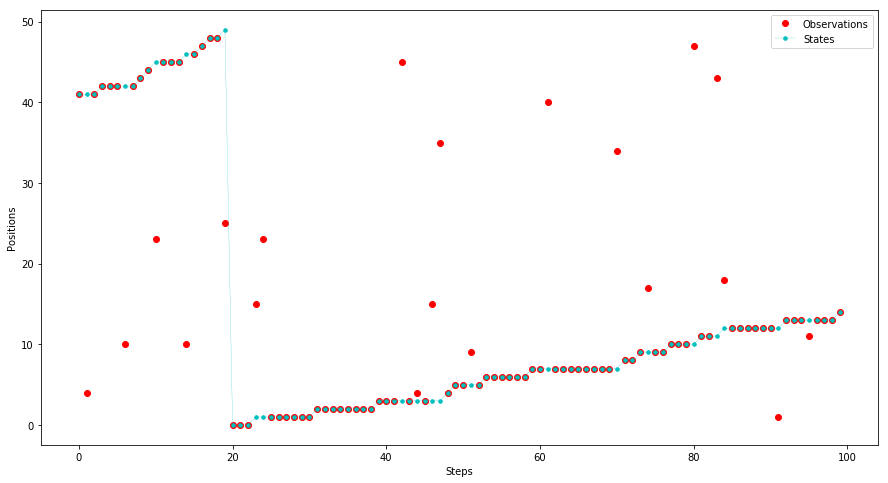

In [0]:
yt, xt = data_generate(trans_mat, obs_mat, prob_start, N, K)

plt.figure(figsize = (15,8))
plt.plot(yt, "ro", label = "Observations")
plt.plot(xt, "c--", label="States",marker=".", linewidth=0.3, markersize=7)
plt.xlabel("Steps")
plt.ylabel("Positions")
plt.legend()
plt.show()

## 5.

Let's implement Forward-Backward algorithms

***Forward pass***

- predict
$$ \alpha_{k|k-1}(x_k) = p(y_{1:k-1}, x_k) = \sum_{x_{k-1}}p(x_{k}| x_{k-1})p
(y_{1:k-1}, x_{k-1}) $$
$$ \alpha_{k|k-1}(x_k) = \sum_{x_{k-1}}p(x_{k}| x_{k-1})\alpha_{k-1|k-1}(x_{k-1})$$

\
- update
$$ \alpha_{k|k}(x_k) = p(y_{1:k}, x_k) = p(y_{k}|x_k)p(y_{1:k-1}, x_k) $$ \
$$ \alpha_{k|k-1}(x_k) = p(y_{k}|x_k)\alpha_{k-1|k}(x_k)$$

***Backward pass***
- predict
$$ \beta_{k|k+1}(x_k) = p(y_{k+1:T}| x_k) = \sum_{x_{k+1}}p(x_{k+1}| x_{k})p(y_{k+1:T}|x_{k+1}) $$
$$ \beta_{k|k+1}(x_k) = \sum_{x_{k+1}}p(x_{k+1}| x_{k})\beta_{k+1|k+1}(x_{k+1})$$

- update

$$\beta_{k|k}= p(y_{k:T}|x_k) = p(y_k|x_k)p(y_{k+1:T}|x_k)$$

$$\beta_{k|k}= p(y_k|x_k)\beta_{k|k+1}(x_k)$$

In [0]:
def state_predict(trans_mat, v):
    """
    Computing trans_mat * v in log-domain
    
    Parameters
    ----------
    trans_mat : State transition matrix
                array : shape (N, N)
                
    v : Filtred potential
        array : shape (N, K)
    
    Returns
    -------
    log_v : array shape (N, K)
            Predicted potential
    """
    
    v_max = np.max(v) 
    p = np.exp(v - v_max)
    log_v = np.log(trans_mat.dot(p)) + v_max
    
    return log_v

def state_update(obs_mat, log_v):
    """
    Updating the state
    
    Parameters
    ----------
    obs_mat : Observation matrix
              array : shape (N, N)
  
    log_v : Predicted potential 
            array : shape (N, K)
    
    Returns
    -------
    lup : array : shape (N, K)
    """
    
    lup = np.log(obs_mat) + log_v
    return lup

In [0]:
def forward_backward(trans_mat, obs_mat, start, N, K, yt):
    # Forward pass
    log_alpha = np.zeros((N, K)) 
    log_alpha_predict = np.zeros((N, K)) 

    # Initialisation
    log_alpha_predict[:, 0] = np.log(start)
    log_alpha[:, 0] = state_update(obs_mat[yt[0]], log_alpha_predict[:, 0])

    for k in range(1, K):
        log_alpha_predict[:,k] = state_predict(trans_mat, log_alpha[:,k - 1])
        log_alpha[:,k] = state_update(obs_mat[yt[k]], log_alpha_predict[:, k])



    # Backward pass
    log_beta = np.zeros((N, K)) 
    log_beta_postdict = np.zeros((N, K)) 

    # Initialisation
    log_beta_postdict[:, K-1] = np.zeros(N)
    log_beta[:, K-1] = state_update(obs_mat[yt[K-1]], log_beta_postdict[:, K-1])

    for k in range(K-2, -1, -1):
        log_beta_postdict[:, k] = state_predict(trans_mat.T, log_beta[:,k + 1])
        log_beta[:, k] = state_update(obs_mat[yt[k]], log_beta_postdict[:, k])
    
    
    return log_alpha, log_beta_postdict

Let's computing quantities defined in 3a,b,f

 * 3a  
 
 $\log(p(x_k | y_{1:k})) = \log(p(x_k , y_{1:k}))-\log(p(y_{1:k}))= \log(\alpha_{k|k}(x_k))-\log(p(y_{1:k}))$
 
 
 * 3b  
 
  $\log(p(x_k | y_{1:K})) = \log(p(x_k , y_{1:K}))-\log(p(y_{1:K}))= \log(p(x_k,y_{1:k})*p(x_k,y_{k:K}))-\log(p(y_{1:K})\\ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \  =\log(\alpha_{k|k}(x_k))+\log(\beta_{k|k}(x_k))-\log(p(y_{1:K}))$
  
 * 3f  
 
 $\underset{x_k}{\mathrm{argmax}} \; p(x_k|y_{1:k}) = 
 \underset{x_k}{\mathrm{argmax}} \; \log(p(x_k|y_{1:k})) $

In [0]:
log_alpha, log_beta_postdict = forward_backward(trans_mat, obs_mat, prob_start, N, K, yt)

# Filtering (3.a)
sum_log_alpha = s(log_alpha)
log_pa = log_alpha - sum_log_alpha

# Smoothing (3.b)
log_gamma =  log_alpha + log_beta_postdict 
sum_log_gamma = s(log_gamma)
log_pb = log_gamma - sum_log_gamma

# (3.f)
most_likely_position = np.zeros(K)
for i in range(K):
    most_likely_position[i] = np.argmax(log_pa[:,i])

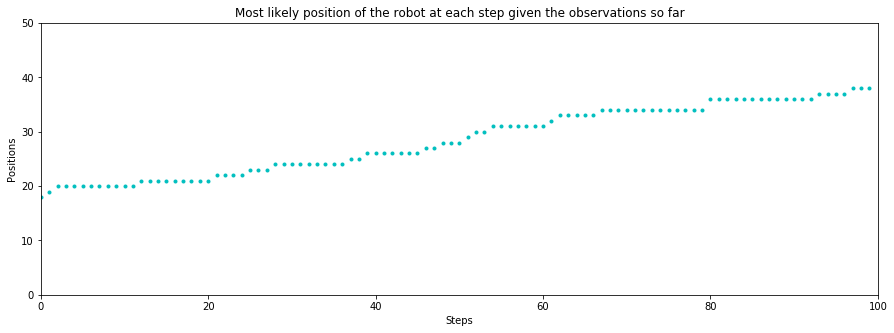

In [0]:
plt.figure(figsize = (15,5))
plt.plot(most_likely_position, "c.")
plt.xlabel("Steps")
plt.ylabel("Positions")
plt.title("Most likely position of the robot at each step given the observations so far")
plt.axis([0, 100, 0, 50])
plt.show()

## 6.

With a probability $\kappa$ the robot is kidnapped and its new position is   independent from its previous position and is uniformly distributed. So with $1−\kappa$, the robot is keep using its normal moving using the matrix $A$ (the transition matrix). This gives us the new transition matrix given by

$$
        A_{new} = \frac{\kappa}{N}
        \begin{pmatrix}
            1       & \dots & \dots & \dots & 1 \\
            \vdots       & \ddots & \dots & \dots & \vdots \\
            \vdots       & \dots & \ddots & \dots & \vdots \\
            \vdots       & \dots & \dots & \ddots & \vdots \\
            1       & \dots & \dots & \dots & 1
        \end{pmatrix}+(1 - \kappa)  A 
 $$

In [0]:
kappa = 0.1
trans_mat_new = (1 - kappa) * trans_mat + kappa * np.ones((N,N)) / N

yt_new, state_new = data_generate(trans_mat_new, obs_mat, prob_start, N, K)

log_alpha_new, log_beta_new_postdict = forward_backward(trans_mat_new, obs_mat, prob_start, N, K, yt_new)

# Filtering (3.a )
sum_log_alpha_new = s(log_alpha_new)
log_filtering_new = log_alpha_new - sum_log_alpha_new

# Smoothing (3.b )
log_gamma_new =  log_alpha_new + log_beta_new_postdict 
sum_log_gamma_new = s(log_gamma_new)
log_smoothing_new = log_gamma_new - sum_log_gamma_new

# Most likely position of the robot given the observations so far (3.f)
most_likely_position_new = np.zeros(K)
for i in range(K):
    most_likely_position_new[i] = np.argmax(log_filtering_new[:,i])

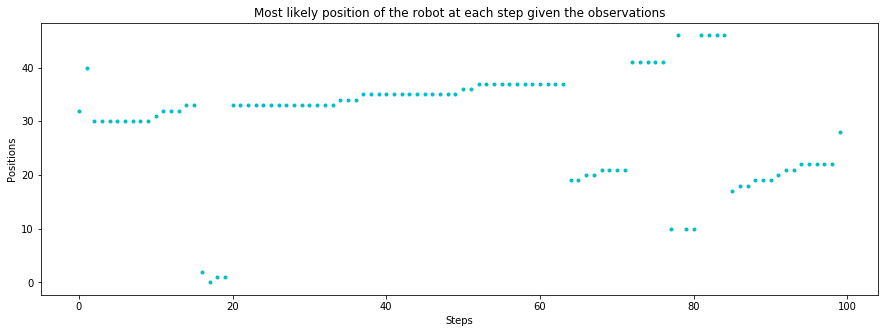

In [0]:
#Let's plot the most likely positions of the robot given the observations so far
plt.figure(figsize = (15,5))
plt.plot(most_likely_position_new, "c.")
plt.xlabel("Steps")
plt.ylabel("Positions")
plt.title("Most likely position of the robot at each step given the observations")
plt.show()